# Case 2. Prediction of image likes using SVR

We are going to use the SVR (Support Vector Regressor) with train + test dataset (80-20). For evaluating the model we will use the Spearman's rank correlation coefficient.

In [16]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.svm import SVR
import time
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
matplotlib.style.use('ggplot')
%matplotlib inline 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.options.display.max_colwidth = 200
pd.set_option('display.width', 1000)

In [18]:
D_DIR = "../data/"
mcdonalds_icmr_clean = "mcdonalds/df_mc_20161005.pkl"
burgerking_icmr_clean = "burgerking/df_bk_20161005.pkl"
df_mc_ = pd.read_pickle(D_DIR + mcdonalds_icmr_clean) # dump csv into a Pandas DataFrame
df_bk_ = pd.read_pickle(D_DIR + burgerking_icmr_clean) # dump csv into a Pandas DataFrame

In [1]:
df_mc_.head(2)

NameError: name 'df_mc_' is not defined

In [4]:
# fit SVR with filter_attribute_num, face_attribute_num, logo_attribute_num, food_attribute_num, weekend_attribute_num,
# sentiment_attribute_num, likes_followed_ratio, brand_num, postedMedia, followersCount, followedByCount, imageTagCount
# PREDICT imageLikeCount
df_mc_["filter_attribute_num"] = df_mc_["filter_attribute"].map(lambda x: 0 if x == "filter no" else 1)
df_mc_["face_attribute_num"] = df_mc_["face_attribute"].map(lambda x: 0 if x == "face no" else 1)
df_mc_["logo_attribute_num"] = df_mc_["logo_attribute"].map(lambda x: 0 if x == "logo no" else 1)
df_mc_["food_attribute_num"] = df_mc_["food_attribute"].map(lambda x: 0 if x == "food no" else 1)
df_mc_["weekend_attribute_num"] = df_mc_["weekend_attribute"].map(lambda x: 0 if x == "weekend no" else 1)
df_mc_["brand_num"] = df_mc_["brand"].map(lambda x: 0 if x == "McDonalds" else 1)

In [118]:
df_mc_numerical.describe()

,imageTagCount,imageLikeCount,imageCommentCount,followedByCount,followersCount,postedMedia,googleFaceCount,likes_followed_ratio,sentiment_attribute_num,filter_attribute_num,face_attribute_num,logo_attribute_num,food_attribute_num,weekend_attribute_num
count,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000,28130.000000
mean,9.125489,37.730181,1.660683,1049.101066,552.508603,600.496516,0.709101,9.153003,0.061571,0.519765,0.299289,0.299289,0.205795,0.341735
std,7.586910,128.179835,5.072387,5742.877412,906.572836,1100.301146,1.528366,19.085723,0.209126,0.499618,0.457955,0.457955,0.404288,0.474300
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,10.000000,0.000000,170.000000,151.000000,124.000000,0.000000,2.781331,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,19.000000,0.000000,334.000000,292.000000,297.000000,0.000000,5.438699,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,36.000000,2.000000,671.000000,570.000000,667.000000,1.000000,10.606061,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,58.000000,12443.000000,388.000000,541112.000000,7504.000000,33629.000000,24.000000,1200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
max_likes_followed_ratio = df_mc_numerical["likes_followed_ratio"].replace([np.inf, -np.inf], np.nan).max()
df_mc_numerical["likes_followed_ratio"] = df_mc_numerical["likes_followed_ratio"].replace([np.inf, -np.inf], max_likes_followed_ratio)

C:\MINICONDA2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
sample_size = 30000
train_columns = ["imageTagCount",
                 # "imageLikeCount",
                 "imageCommentCount",
                 "followedByCount",
                 "followersCount",
                 "postedMedia",
                 "googleFaceCount",
                 #"likes_followed_ratio",
                 "sentiment_attribute_num", "filter_attribute_num", "face_attribute_num",
                 "logo_attribute_num", "food_attribute_num", "weekend_attribute_num"]
X = pd.concat([df_mc_numerical[attribute] for attribute in train_columns], axis=1)
y = df_mc_numerical["imageLikeCount"]

### Support Vector Regression

In [ ]:
start = time.time()
#svr_k = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
#    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

svr_k = SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

svr_k.fit(X, y) 
print("Fitting of the model took", str(float(time.time() - start)), "seconds")

[LibSVM]

In [ ]:
svr_k.coef_

In [48]:
# +1 would be the perfect score, -1 worst and "counter-explain" the model
svr_k.score(X, y) # R^2, how much the model explains

0.82242621543046313

## Gradient Boosting Regressor

In [9]:
start = time.time()
est = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=4, random_state=0, loss='ls').fit(X, y)
print("Fitting of the model took", str(float(time.time() - start)), "seconds")

('Fitting of the model took', '30.1019999981', 'seconds')


In [10]:
est.feature_importances_

array([ 0.0659974 ,  0.15181176,  0.43198207,  0.08915645,  0.15660889,
        0.01271094,  0.05840833,  0.01734283,  0.00376983,  0.00353418,
        0.0063602 ,  0.00231712])

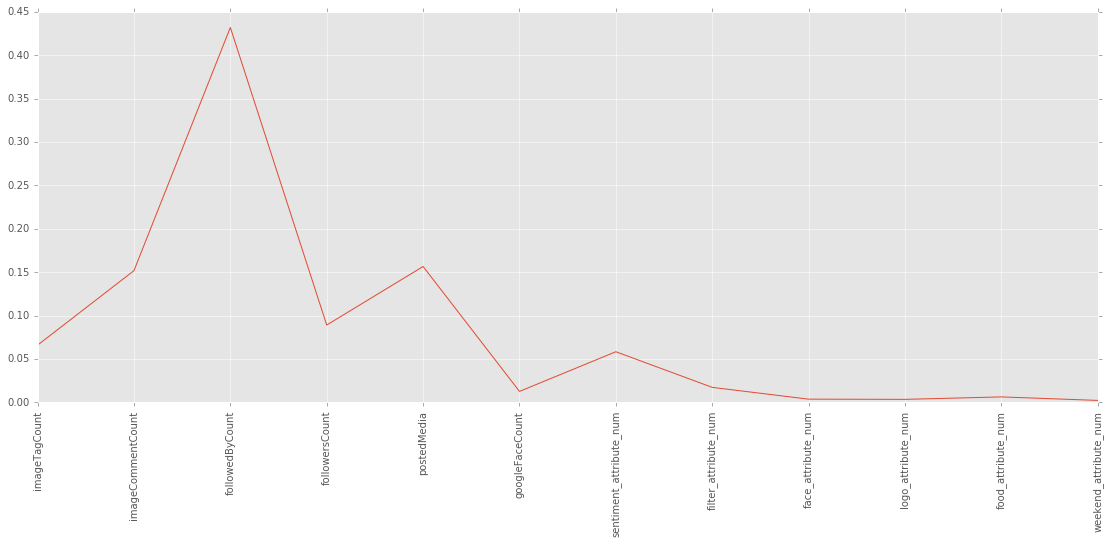

In [11]:
fig = plt.figure()

x = np.array(range(len(train_columns)))
plt.xticks(x, train_columns, rotation=90)
plt.plot(x, est.feature_importances_.ravel())
fig.set_figwidth(19)
fig.set_figheight(7)

In [12]:
est.score(X, y)

0.90803719630610469

In [218]:
tree = est.estimators_[0, 0].tree_
#tree.children_left
leaf_mask = tree.children_left == TREE_LEAF  # TREE_LEAF == -1
w_i = tree.value[leaf_mask, 0, 0]

In [15]:
est.predict([3, 10, 1000, 100, 100, 0, 0, 0, 0, 0, 0, 0])

C:\MINICONDA2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 95.02932715])

In [ ]:
# http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py
svr_rbf = SVR(kernel='rbf', C=1e1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e1)
svr_poly = SVR(kernel='poly', C=1e1, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

In [ ]:
# +1 would be the perfect score, -1 worst and "counter-explain" the model
svr_rbf.score(X, y)

In [ ]:
svr_lin.score(X, y)

In [ ]:
svr_poly.score(X, y)

In [62]:
lw = 2
#plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

KeyboardInterrupt: 

ranker

In [ ]:
# http://www2.warwick.ac.uk/fac/sci/moac/people/students/peter_cock/python/rank_correlations/
# http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html
from scipy import spearmanr
spearmanr([1,2,3,4,5],[5,6,7,8,7])

numerical columns correlation

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_mc_numerical = df_mc_.select_dtypes(include=numerics)
df_mc_numerical.drop(["imageDateCreated", "imageLongitude", "imageLatitude", "userId", "product",
                      "conjoint_category", "brand_num"], 1, inplace=True)

C:\MINICONDA2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [66]:
df_mc_numerical.head(10)

,imageTagCount,imageLikeCount,imageCommentCount,followedByCount,followersCount,postedMedia,googleFaceCount,likes_followed_ratio,sentiment_attribute_num,filter_attribute_num,face_attribute_num,logo_attribute_num,food_attribute_num,weekend_attribute_num
0,7,3,0,132,268,1111,0,2.272727,0.500000,0,0,0,0,0
1,24,27,2,158,136,333,0,17.088608,-0.220000,0,0,0,0,1
2,3,4,1,123,96,55,0,3.252033,0.000000,1,0,0,0,1
3,20,65,2,2056,1779,109,0,3.161479,-0.600000,0,0,0,1,1
4,24,5370,93,87660,3775,4568,0,6.125941,-0.220000,0,0,0,0,1
5,10,5,1,7,16,1,0,71.428571,1.000000,0,0,0,0,1
7,12,14,3,608,1676,1837,1,2.302632,0.500000,0,1,1,0,0
8,28,223,17,7576,2666,544,0,2.943506,-0.325000,0,0,0,1,0
9,30,16,0,31,13,18,0,51.612903,0.292708,0,0,0,1,0
10,8,9,0,68,68,73,0,13.235294,0.000000,0,0,0,0,0


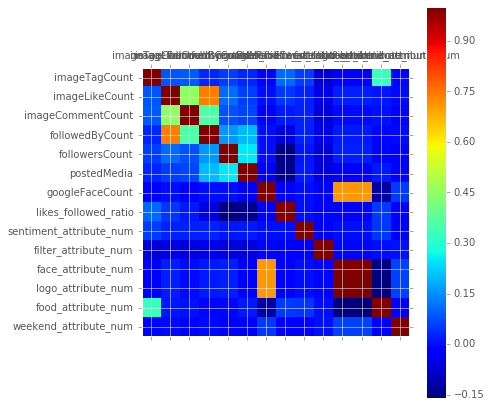

In [90]:
from matplotlib import ticker
alpha = ["imageTagCount", "imageLikeCount", "imageCommentCount", "followedByCount", "followersCount",
         "postedMedia", "googleFaceCount", "likes_followed_ratio", "sentiment_attribute_num",
         "filter_attribute_num", "face_attribute_num", "logo_attribute_num", "food_attribute_num", "weekend_attribute_num"]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_mc_numerical.corr(), interpolation='nearest')
fig.colorbar(cax)
fig.set_figheight(7)


ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
ax.axis('image')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()
